# Plotting with Python

__Plotting is an essential component of data analysis__. It helps you to understand complex data sets and help others understand them too. However, the python visualization world can be a frustrating place. There are many different options and choosing the right one is a challenge. 

## The Python Visualization Landscape


![Python Visualization Landscape](_img/landscape.png)
 
 
Source: [Nicolas P. Rougier](https://github.com/rougier/python-visualization-landscape): An adaptation the Python Visualization Landscape slide from [Jake VanderPlas](http://vanderplas.com/)' keynote at PyCon 2017 ([slides](https://speakerdeck.com/jakevdp/pythons-visualization-landscape-pycon-2017), [video](https://www.youtube.com/watch?v=FytuB8nFHPQ)). 


Online you find many post and reports which compare and assess different Python libraries (e.g. blog post by [Dan Saber](https://dsaber.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/) or by [Tim Hopper](http://pythonplot.com/)). These are very valuable sources of information if you are not yet sure which library fits best your needs. 

In this section we introduce three plotting libraries.


### matplotlib

[matplotlib](https://matplotlib.org/)  is probably the most well known 2D plotting Python library. It allows to produce publication quality figures in a variety of formats and interactive environments across platforms. However, matplotlib is the cause of frustration due to the complex syntax. 


### Seaborn

[Seaborn](http://seaborn.pydata.org/index.html) is a library for making attractive and informative statistical graphics in Python. It is built on top of [matplotlib](https://matplotlib.org/) and it supports [numpy](http://www.numpy.org/) and [pandas](http://pandas.pydata.org/) data structures and statistical routines from [scipy](https://scipy.org/) and [statsmodels](http://www.statsmodels.org/stable/index.html).

_If matplotlib tries to make easy things easy and hard things possible, seaborn tries to make a well-defined set of hard things easy too_ ([Quote by Michael Waskom](http://seaborn.pydata.org/introduction.html)).



### HoloViews

[HoloViews](http://holoviews.org/) one out of several interactive plotting libraries. It is an open-source Python library designed to make data analysis and visualization seamless and simple. 


## Data generation

For the sake of simplicity we create a sine curve a cosine curve for plotting. 

In [10]:
import numpy as np

X= np.linspace(start=2*-np.pi, stop=2*np.pi, num=300)
C = np.cos(X)
S = np.sin(X)

***
## Matplotlib

matplotlib, created by [John D. Hunter](https://en.wikipedia.org/wiki/John_D._Hunter), is probably the single most used Python package for 2D-graphics. It provides both a very quick way to visualize data from Python and publication-quality figures in many formats. 

matplotlib's `pyplot` module provides a convenient interface to the matplotlib object-oriented plotting library. It is modeled closely after [MATLAB](https://de.wikipedia.org/wiki/Matlab). 

We import the matplotlib libarary and matplotlib's `pyplot` module using the canonical commands

    import matplotlib as mpl
    import matplotlib.pyplot as plt

Further, when working with Jupyter notebooks we call the magic function

    % matplotlib inline

to make sure the figures are created within the notebook (actually the figures are shown directly in the cell output).

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

It is worth noting that __matplotlib has two interfaces__. The first is based on MATLAB and uses a __state-based interface__. The second option is an an __object-oriented interface__. Hence, multiple solutions to problems that look somewhat similar but are not the same, which for sure causes confusion for new users if the looking for solutions to their tasks via [stack overflow](https://stackoverflow.com/) or Google search. _(Note that in this section we use the object oriented interface.)_

Yet another source of confusion is that matplotlib is well integrated into other Python libraries, such as [pandas](http://pandas.pydata.org/), [seaborn](http://seaborn.pydata.org/index.html), [xarray](http://xarray.pydata.org/en/stable/), among others. Hence, there is confusion as to when one should use pure matplotlib to plot something with a tool that is built on top of matplotlib. 

> **Be aware that anytime there is more than one way to build a visualization. Therefore it is challenging for the new or infrequent user to follow the right path.** 

###  Creating a Figure and ac Axes object 

> With respect to matplotlib terminology it is important to understand that the `Figure` is the final image that may contain one or more axes. The `Axes` represent an individual plot.    

To create a `Figure` object we call

    plt.figure()

However, a more convenient way to create a `Figure` object and an `Axes` object at once, is to call

    plt.subplots() 
    
Note that the function call returns `Figure` object and an `Axes` object (or array of `Axes` objects).

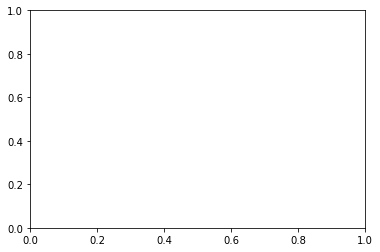

In [12]:
fig, ax = plt.subplots()

In [13]:
print(type(fig))
print(type(ax))

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


Now can use the `Axes` object `ax` to add data for plotting. Therefore we simply call the `plot` function on the `Axes` object. Note that the `plot` function expect an `x` and a `y` argument.

### Plot some data

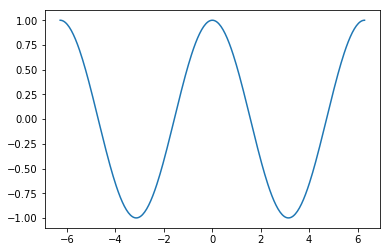

In [14]:
fig, ax = plt.subplots()
ax.plot(X, C)

To add more data on the same `Axes` object we call the `plot` function sequentially.

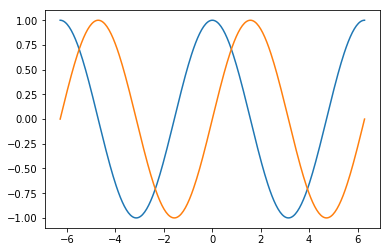

In [15]:
fig, ax = plt.subplots()
ax.plot(X, C)
ax.plot(X, S)

### Customizing the plot

There are many ways to provide different plotting styles. Look up the [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html) for details.

For the sake of this tutorial we color the cosine curve green and use a dashed line with a line width of 3.5 for the sine curve.

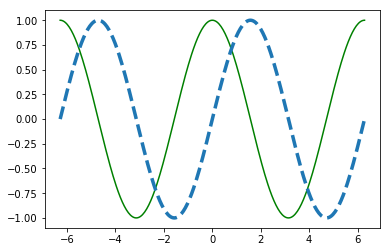

In [16]:
fig, ax = plt.subplots()
ax.plot(X, C, color="green")
ax.plot(X, S, linestyle="--", linewidth=3.5)

> __Customizing the plot__ 
We are going to 
* add a title to the plot
* add a legend to the plot
* set a limit for the x-axis
* set x and y ticks
* set tick labels for the x axis
* add a grid
* adjust the figure size
* save the figure to disk


In order to further design our plot we need to get familiar with the matplotlib terminology. The graphic below from the [matplotlib faq](https://matplotlib.org/faq/usage_faq.html) helps in understanding the different terminology of a plot.

<img src="_img/mpl_anatomy.png" width="600">

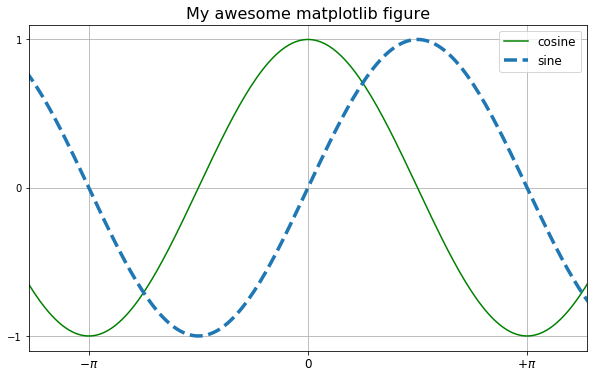

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(X, C, color="green", label="cosine")
ax.plot(X, S, linestyle="--", linewidth=3.5, label="sine")
ax.set_title("My awesome matplotlib figure", size=16)
ax.legend(fontsize=12)
ax.set_xlim([-4,4])
ax.set_xticks([-np.pi, 0, np.pi])
ax.set_yticks([-1, 0, 1])
ax.set_xticklabels(['$-\pi$', '$0$', '$+\pi$'], size=12)
ax.grid()

filepath = "../figures/my_awesome_mpl_figure.png"
fig.savefig(filepath, dpi=300)

> __Final note__: The matplotlib library is extremely powerful. For more information and inspiration visit the [gallery site](https://matplotlib.org/gallery/index.html) of the matplotlib documentation or check out the great tutorial by [Nicolas P. Rougier](https://github.com/rougier/matplotlib-tutorial) or the blog post by [Chris Moffitt](http://pbpython.com/effective-matplotlib.html), which were inspiring sources for this section.

***

## Seaborn

[Seaborn](https://seaborn.pydata.org/) is a Python visualization library based on matplotlib. It provides a high-level interface for drawing **attractive statistical graphics**.

In [21]:
import seaborn as sns

# Use seaborn graphic settings
sns.set()

# Load the example Iris flower dataset
iris = sns.load_dataset("iris")
#iris

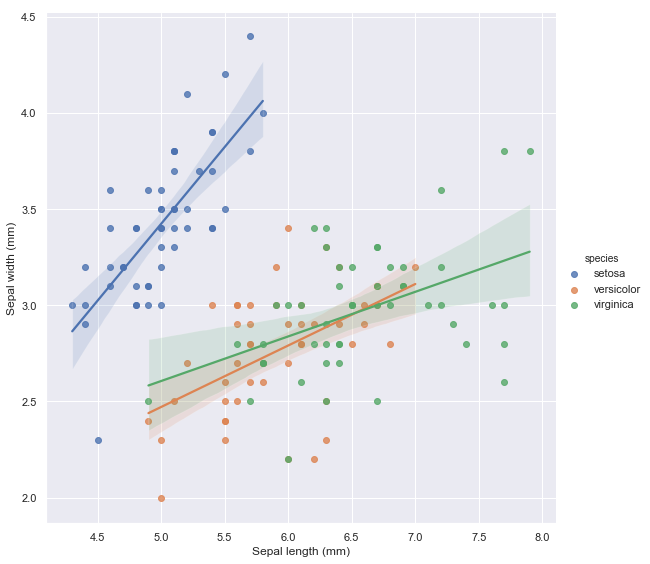

In [22]:
# Plot tip as a function of total bill across days
g = sns.lmplot(x="sepal_length", y="sepal_width", hue="species",
               truncate=True, height=8, data=iris)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Sepal length (mm)", "Sepal width (mm)");

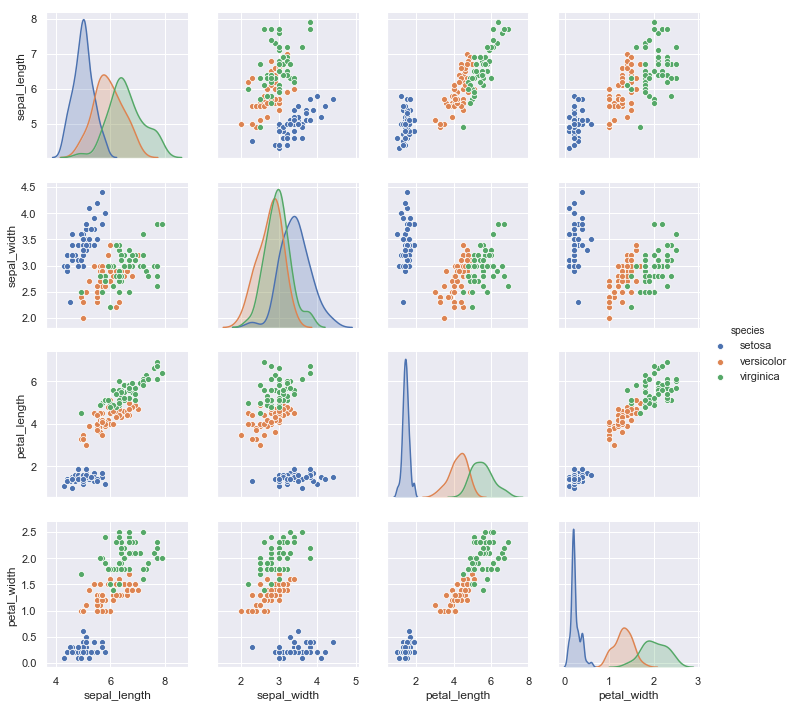

In [23]:
sns.pairplot(iris, hue="species");

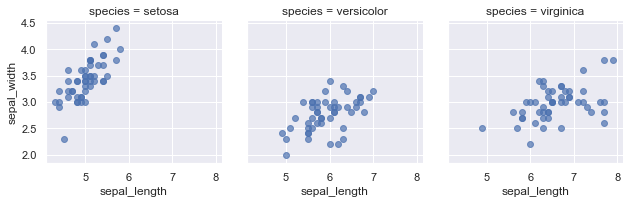

In [24]:
g = sns.FacetGrid(data=iris, col="species")
g.map(plt.scatter, "sepal_length", "sepal_width", alpha=.7);

***

## Holoviews

[HoloViews](http://holoviews.org/) is an open-source Python library designed to make data analysis and visualization seamless and simple. With HoloViews, you can usually express what you want to do in very few lines of code, letting you focus on what you are trying to explore and convey, not on the process of plotting.

**A Reproduction of Gapminder**

In [Hans Rosling's](https://de.wikipedia.org/wiki/Hans_Rosling) iconic [TED Talk](https://www.ted.com/talks/hans_rosling_shows_the_best_stats_you_ve_ever_seen) he shows us that many advances have been made since the 60s, when our notions of development were established. The engaging infographic illustrates how our ongoing perceptions of a "first world" and a "third world" are wrong, and that the world has become a spectrum of developing countries.

Gapminder demo demonstrating how to combine to extend a HoloViews plot with custom bokeh widgets to deploy an app  ([Source code](http://holoviews.org/gallery/apps/bokeh/gapminder.html#bokeh-gallery-gapminder))

In [1]:
import pandas as pd
import numpy as np
import holoviews as hv

from bokeh.io import curdoc, output_notebook, show
from bokeh.application.handlers import FunctionHandler
from bokeh.application import Application
from bokeh.layouts import layout
from bokeh.models import Slider, Button
from holoviews.plotting.bokeh import BokehRenderer

# Activate bokeh 
output_notebook()

Loading BokehJS ...

In [16]:
# Load data set 
gapminder_df = pd.read_csv("../data/gapminder.csv")
# Declare data set
ds = hv.Dataset(gapminder_df)

def gapminder_plot(doc):    
    # Apply dimension labels and ranges
    kdims = ['Fertility', 'Life expectancy']
    vdims = ['Country', 'Population', 'Group']
    dimensions = {
        'Fertility' : dict(label='Children per woman (total fertility)', range=(0, 10)),
        'Life expectancy': dict(label='Life expectancy at birth (years)', range=(15, 100)),
        'Population': ('population', 'Population')
    }
    
    # Create Points plotting fertility vs life expectancy indexed by Year
    gapminder_ds = ds.redim(**dimensions).to(hv.Points, kdims, vdims, 'Year')

    # Define annotations
    text = gapminder_ds.clone({yr: hv.Text(1.2, 25, str(int(yr)), fontsize=30)
                               for yr in gapminder_ds.keys()})

    # Define options
    opts = {'plot': dict(width=950, height=450,tools=['hover'], size_index='Population',
                         color_index='Group', size_fn=np.sqrt, title_format="{label}"),
           'style': dict(cmap='Set1', size=0.3, line_color='black', alpha=0.6)}
    text_opts = {'style': dict(text_font_size='52pt', text_color='lightgray')}

    # Combine Points and Text
    hvgapminder = (gapminder_ds({'Points': opts}) * text({'Text': text_opts})).relabel('Gapminder Demo')

    # Define custom widgets
    def animate_update():
        year = slider.value + 1
        if year > end:
            year = start
        slider.value = year

    # Update the holoviews plot by calling update with the new year.
    def slider_update(attrname, old, new):
        hvplot.update((new,))

    def animate():
        if button.label == '► Play':
            button.label = '❚❚ Pause'
            doc.add_periodic_callback(animate_update, 200)
        else:
            button.label = '► Play'
            doc.remove_periodic_callback(animate_update)

    start, end = ds.range('Year')
    slider = Slider(start=start, end=end, value=start, step=1, title="Year")
    slider.on_change('value', slider_update)

    button = Button(label='► Play', width=60)
    button.on_click(animate)
    
    # Get HoloViews plot
    hvplot = BokehRenderer.get_plot(hvgapminder, doc)
    # Make a bokeh layout and add it as the Document root
    plot = layout([[hvplot.state], [slider, button]], sizing_mode='fixed')
    doc.add_root(plot)
    return doc

In [17]:
# To display in the notebook
handler = FunctionHandler(gapminder_plot)
app = Application(handler)
show(app)

***